<a href="https://colab.research.google.com/github/Hoangthang017/CS114.K21/blob/master/ScrapData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scrap dữ liệu từ 2 trang web :** 
  - HuffPost : non-sarcastic
  - TheOnion : sarcastic

####**import thư viện :**
  - Request : gửi yêu cầu đến url
  - urlopen : mở url
  - BeautifulSoup : lấy headline từ các thẻ trong source của url

In [109]:
from urllib.request import Request , urlopen 
from bs4 import BeautifulSoup

####**Scrap dữ liệu từ trang HuffPost**
- Ý tưởng : Scrap dữ liệu từng tab trong mục News của trang HuffPost UK
- Thực hiện :
  - Sử dụng vòng for để kiểm soát số tab cần scrap để tránh dữ liệu quá ít hoặc quá nhiều
  - Sau khi tìm được url của website cần scrap thì ta sẽ gửi yêu cầu đến url đó 
  - Tiếp đến mở url vừa được yêu cầu
  - Sử dụng BeautifullSoup để lấy source của website vừa mới được mở 
  - Sau khi lấy được source của web, ta quan sát thấy các headline của trang này nằm trong thẻ <\a> với class_name = card__link yr-card-headline 
    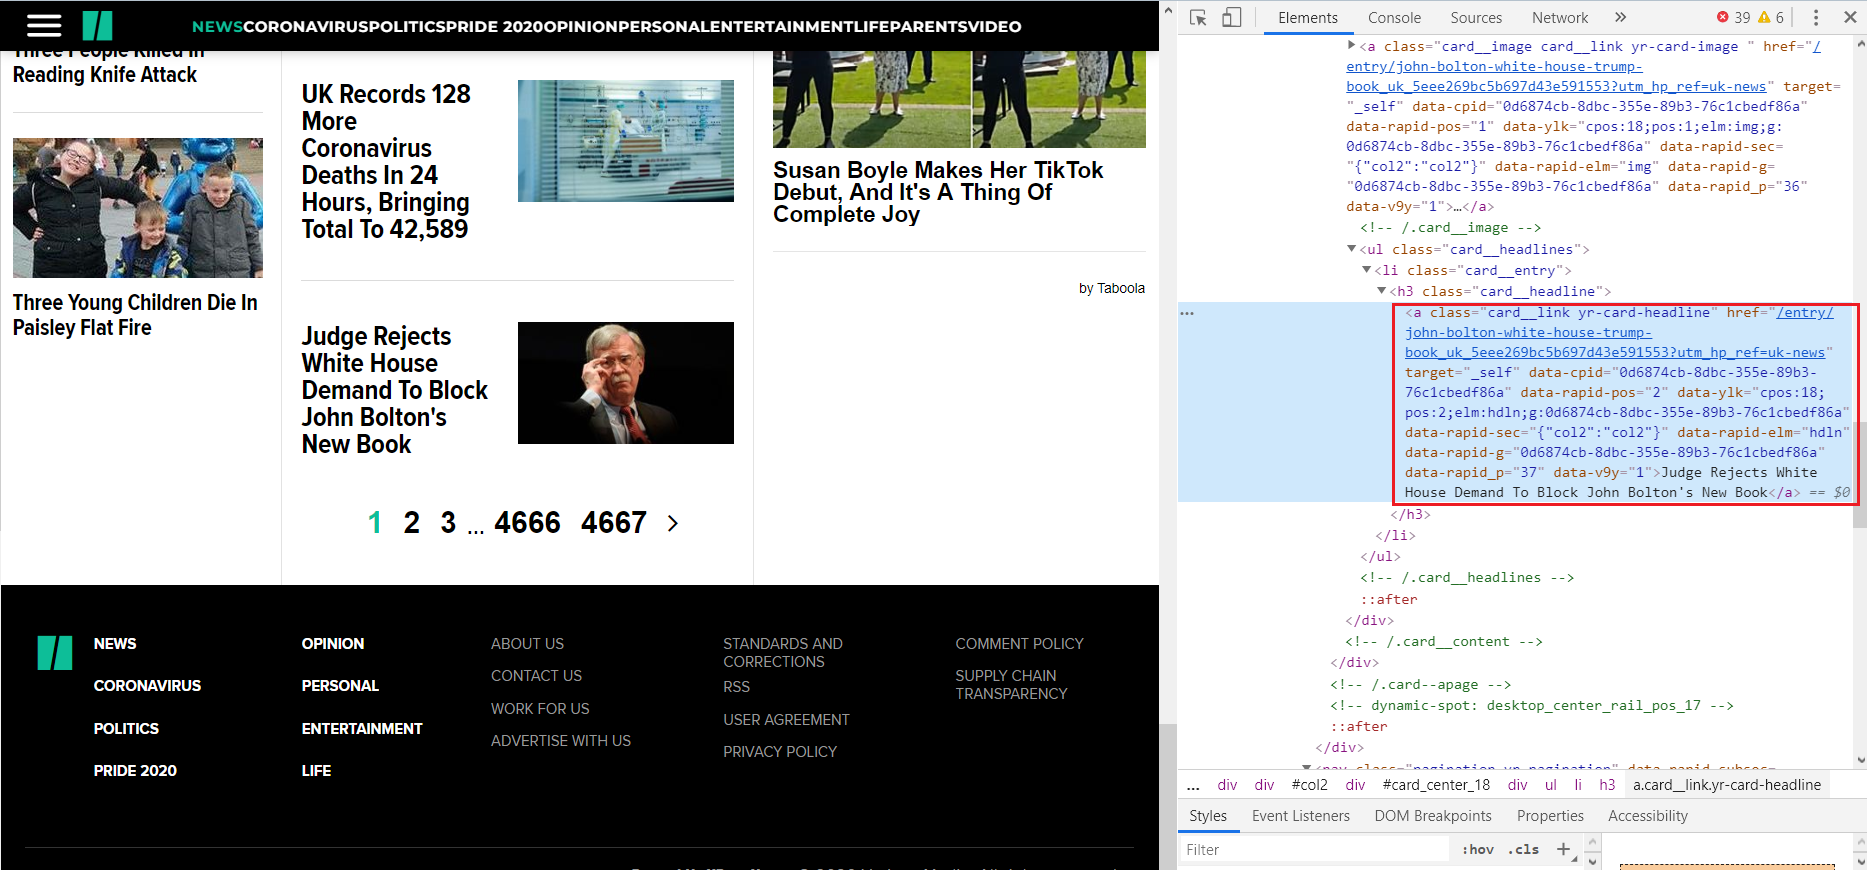
  - Vì thế ta dùng hàm find_all của thư viện BeautifullSoup để lấy ra tất các thẻ này
  - Tiếp theo ta tách headline bằng hàm text 
  - Cuối cùng kiểm tra xem headline vừa mới lấy ra có nằm trong Data chưa , nếu chưa thì đẩy nó và label của dữ liệu này là 0 vào data
- Kết quả : từ 50 tab của mục News ta lấy được 1600 headline

In [114]:
# scrap data form HuffPost
huff_data = []

# sử dụng vòng lặp để load trang tiếp theo trong phần news 
for i in range(50):

  # định dạng url của phần news trong trang HuffPost với i tương ứng với số trang
  url = 'https://www.huffingtonpost.co.uk/news/'+ str(i) +'/?guccounter=2'

  # gửi request HTTP 1.1 đến url với header tự chỉnh 
  req = Request(url,headers={'User-Agent': 'ScrapData/3.0'})

  # mở url với thời gian chờ là 10s 
  page = urlopen(req,timeout=10)

  # sử dụng BeautifulSoup để lấy source của website với định dạng văn bản html
  soup = BeautifulSoup(page,"html.parser")

  # sử dụng hàm find_all để tìm tất cả thẻ a có name_class : card__link yr-card-headline
  headlines = soup.find_all('a',attrs={'class':'card__link yr-card-headline'})

  # tách headline từ thẻ và gán label cho nó 
  for hl in range(len(headlines)):

    # hàm text sẽ lấy ra phần text trong thẻ 
    headline = headlines[hl].text

    # kiểm tra headline có tồn tại trong data chưa 
    if headline not in huff_data:
      data = [headline,0]
      huff_data.append(data)

In [125]:
print(huff_data[:10])
print(len(huff_data))

[["The White House's Attempt To Explain Trump's Tiny Rally Turnout Is As Nonsensical As You'd Expect", 0], ['Before Covid-19 This Was Going To Be My First Black Pride', 0], ['Just Spit Into A Pot For New Coronavirus Test That Could Replace Throat Swab', 0], ["Reading Park Terror Suspect 'Came To The Attention Of MI5 Last Year'", 0], ['Campaigners Blast Police As Black Driver Is Pulled Over On Suspicion Of Using Vaseline To Smuggle Drugs', 0], ['Manchester Shooting: Double Murder Inquiry Launched As Second Victim Dies', 0], ['1 Dead, 11 Injured In Minneapolis Shooting', 0], ['Reading Stabbing Attack Declared A Terrorist Incident, Police Say', 0], ["Law Graduate Pursues Private Prosecution Of 'Arrogant' Dominic Cummings", 0], ["Trump Uses Racist Terms 'Kung Flu' And 'Chinese Virus' To Describe Covid-19", 0]]
1600


####**Scrap dữ liệu từ trang TheOnion**
- Ý tưởng : tương tự trang HuffPost lấy dữ liệu của từng tab của mục News-in-Brief
- Thực hiện : 
   - Khá giống với scrap dữ liệu của trang HuffPost
   - Tuy nhiên phần url của tab mới có dạng url gốc + 1 chuỗi ứng với tab đó 
   - Vì thế cần phải lấy tail_url nằm trong phần link href của nút More-Stories
    ![alt text](https://uphinh.org/image/huffpost.ukEzZI)
   - Kiểm tra và đẩy dữ liệu vào data với label = 1
- Kết quả : sau khi scrap 80 tab ta cũng thu được 1600 headline 



In [121]:
# scrap dữ liệu từ trang onion
onion_data= []

# đuôi url của mỗi tab 
tail_url = ''

# Sử dụng vòng lặp để scrap từng tab
for i in range(80):
  # url có định dạng url gốc của mục news-in-brief cộng với tail_url của mỗi tab, tab đầu tiên có đuôi trong từ tab 2 đuôi url sẽ ứng với 1 chuỗi số 
  url = 'https://www.theonion.com/c/news-in-brief' + tail_url

  # gửi yêu cầu đến url
  req = Request(url, headers={'ScrapData':'XYZ/3.0'})

  # mở url
  page = urlopen(req,timeout=10)

  # lấy source của web
  soup = BeautifulSoup(page,'html.parser')

  # tìm tất cả thẻ h2 với class_name = sc-759qgu-0 cYlVdn cw4lnv-6 eXwNRE
  headlines = soup.find_all('h2',attrs={'class':'sc-759qgu-0 cYlVdn cw4lnv-6 eXwNRE'})

  # tách headline và gắn label
  for hl in range(len(headlines)):

    # tách headline 
    headline = headlines[hl].text

    # kiểm tra headline có tồn tại trong data chưa 
    if headline not in onion_data:
      data = [headline,1]
      onion_data.append(data)

  # lấy tail_url của tab tiếp theo nằm trong href của thẻ a với data-ga = [["Story type page click","More stories click"]]
  # sử dụng hàm get('href') để lấy dữ liệu của href 
  tail_url = str(soup.find('a',attrs={'data-ga':'[["Story type page click","More stories click"]]'}).get('href'))

In [122]:
print(onion_data[:10])
print(len(onion_data))

[['Dog Owner Not Sure How City Expects Her To Pick Up Every Drop Of Dog Piss In Little Bag', 1], ['Public Pressure Mounts For U.S. Government To Stop Designating KKK As 501(c)(3) Nonprofit', 1], ['Huh, Boyfriend’s Ex Just Made Interesting Hair Choice', 1], ['‘It’s Perfect Outside,’ Announces Sweating Woman Slowly Losing Consciousness In Middle Of Heatstroke', 1], ['Man Hates How Hot Dog-Eating Contests Reduce Art Of Eating Hot Dogs To A Competition', 1], ['Resigned Pew Research Study Has No Fucking Clue What’s Going On With 15% Of Americans', 1], ['White House Toilet Doesn’t Know If It Can Handle Another 4 Years Of Trump', 1], ['Kentucky Attorney General So Starstruck By Letter From Beyoncé He Unable To Even Read What It’s About', 1], ['Researchers Find Crows Smart Enough Not To Let On How Smart They Really Are', 1], ['Sony Reveals PS5 Fully Customizable With Different Little Hats', 1], ['Report: This A Goddamn Walk In The Park Compared To What’s Coming In 2027', 1], ['Heavily Armed Fa

#**Ghi dữ liệu vào file CSV**
- Mount đến drive để lấy tệp cần ghi vào
- Dùng thư viện csv để chuyển data từ dạng list sang csv

####**Mount drive**

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####**Chuyển từ List sang CSV**

In [124]:
# impor thư viện csv
import csv

# các header của dữ liệu
Headers = [[ "Headline", "label"]]

# mở tệp Headlines_Data trong Drive với chế độ ghi
with open('/content/drive/My Drive/CS114/DataHeadline/Headlines_Data.csv', 'w', newline='') as file:
  # Sử dụng hàm writer để thực hiện ghi vào file   
    writer = csv.writer(file)

  # sử dụng wrirerows để ghi thành nhiều cột 
    # ghi header
    writer.writerows(row_list)

    # ghi onion data
    writer.writerows(onion_data)

    # ghi huffpost data
    writer.writerows(huff_data)